In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator, LogLocator, ScalarFormatter)
from pylab import *
from scipy.interpolate import make_interp_spline, BSpline

In [2]:
diff_d = pd.read_csv('data_for_figures/2_diffusion_barrier_vs_charge_dimers.csv')
diff_s = pd.read_csv('data_for_figures/2_diffusion_barrier_vs_charge_single.csv')
adsorp_d = pd.read_csv('data_for_figures/3_adsorption_energy_vs_charge_dimers.csv')
adsorp_s = pd.read_csv('data_for_figures/3_adsorption_energy_vs_charge_single.csv')
barrier_d = pd.read_csv('data_for_figures/4_adsorption_desorption_barriers_vs_charge_dimers.csv')
barrier_s = pd.read_csv('data_for_figures/4_adsorption_desorption_barriers_vs_charge_single.csv')
PDOS_s = pd.read_csv('data_for_figures/5a_PDOS_S.csv')
PDOS_t = pd.read_csv('data_for_figures/5b_PDOS_TS.csv')
PDOS_D = pd.read_csv('data_for_figures/6_PDOS_D2_D3.csv')
ad_en = pd.read_csv('data_for_figures/8_adsorption_energy_vs_charge_bothsides.csv')



In [5]:
PDOS_D

E-Ef     D3_up   D3_down     D2_up    D2_down
0    -19.4795  2.284997 -2.284997  2.284997  -0.204914
1    -19.4695  3.414936 -3.414936  3.414936  -0.552352
2    -19.4595  4.401409 -4.401409  4.401409  -1.206378
3    -19.4495  5.065184 -5.065184  5.065185  -2.167156
4    -19.4395  5.405880 -5.405880  5.405885  -3.269289
5    -19.4295  5.536371 -5.536371  5.536400  -4.257737
6    -19.4195  5.571737 -5.571737  5.571862  -4.952978
7    -19.4095  5.578108 -5.578108  5.578555  -5.340300
8    -19.3995  5.581892 -5.581891  5.583242  -5.517164
9    -19.3895  5.593080 -5.593076  5.596628  -5.591416
10   -19.3795  5.618640 -5.618618  5.626981  -5.629298
11   -19.3695  5.664468 -5.664381  5.682051  -5.659951
12   -19.3595  5.724772 -5.724502  5.756992  -5.697334
13   -19.3495  5.763790 -5.763143  5.812301  -5.754763
14   -19.3395  5.720216 -5.719011  5.775387  -5.844400
15   -19.3295  5.562701 -5.560963  5.602354  -5.956874
16   -19.3195  5.350874 -5.348967  5.355614  -6.029767
17   -19.3095  5.205817 -5.204326  5.182029  -5.948993
18   -19.2995  5.197507 -5.196945  5.178465  -5.629845
19   -19.2895  5.285772 -5.286334  5.300370  -5.132572
20   -19.2795  5.379325 -5.380815  5.423837  -4.671609
21   -19.2695  5.419737 -5.421645  5.468800  -4.463806
22   -19.2595  5.404044 -5.405782  5.443129  -4.565700
23   -19.2495  5.363055 -5.364261  5.399410  -4.867150
24   -19.2395  5.334053 -5.334700  5.380112  -5.204365
25   -19.2295  5.338925 -5.339195  5.396107  -5.451930
26   -19.2195  5.376050 -5.376138  5.435569  -5.555970
27   -19.2095  5.428735 -5.428758  5.481401  -5.541029
28   -19.1995  5.477560 -5.477564  5.519375  -5.484064
29   -19.1895  5.509151 -5.509151  5.539413  -5.453813
...       ...       ...       ...       ...        ...
2421   4.7305  7.615698 -7.438015  8.891183 -11.541237
2422   4.7405  7.012937 -6.789883  8.464908 -11.228063
2423   4.7505  6.601390 -6.352716  8.197560 -10.814141
2424   4.7605  6.194873 -5.961813  7.842588 -10.352272
2425   4.7705  5.705050 -5.542973  7.253153  -9.846050
2426   4.7805  5.182518 -5.128626  6.439317  -9.302924
2427   4.7905  4.709510 -4.757988  5.512977  -8.729221
2428   4.8005  4.295745 -4.403808  4.605748  -8.103211
2429   4.8105  3.903376 -4.016690  3.816167  -7.401649
2430   4.8205  3.532906 -3.608534  3.198462  -6.648013
2431   4.8305  3.248009 -3.267196  2.773336  -5.910448
2432   4.8405  3.132836 -3.105891  2.533737  -5.258150
2433   4.8505  3.236071 -3.197747  2.442732  -4.729799
2434   4.8605  3.514503 -3.505469  2.441180  -4.323164
2435   4.8705  3.797428 -3.839266  2.471729  -3.988820
2436   4.8805  3.853692 -3.937495  2.502290  -3.646790
2437   4.8905  3.565484 -3.664914  2.524415  -3.246242
2438   4.9005  3.028076 -3.124257  2.520094  -2.819321
2439   4.9105  2.437575 -2.532872  2.429542  -2.460670
2440   4.9205  1.911903 -2.020999  2.172653  -2.248446
2441   4.9305  1.460219 -1.588075  1.726390  -2.187074
2442   4.9405  1.070294 -1.200728  1.176567  -2.214432
2443   4.9505  0.752672 -0.860515  0.670600  -2.248159
2444   4.9605  0.515301 -0.587228  0.314279  -2.225784
2445   4.9705  0.345795 -0.387002  0.119758  -2.117378
2446   4.9805  0.224638 -0.249166  0.036831  -1.917233
2447   4.9905  0.138327 -0.157333  0.009097  -1.631680
2448   5.0005  0.079135 -0.096697  0.001799  -1.278212
2449   5.0105  0.041175 -0.056507  0.000284  -0.896041
2450   5.0205  0.018988 -0.030286  0.000036  -0.545522

[2451 rows x 5 columns]

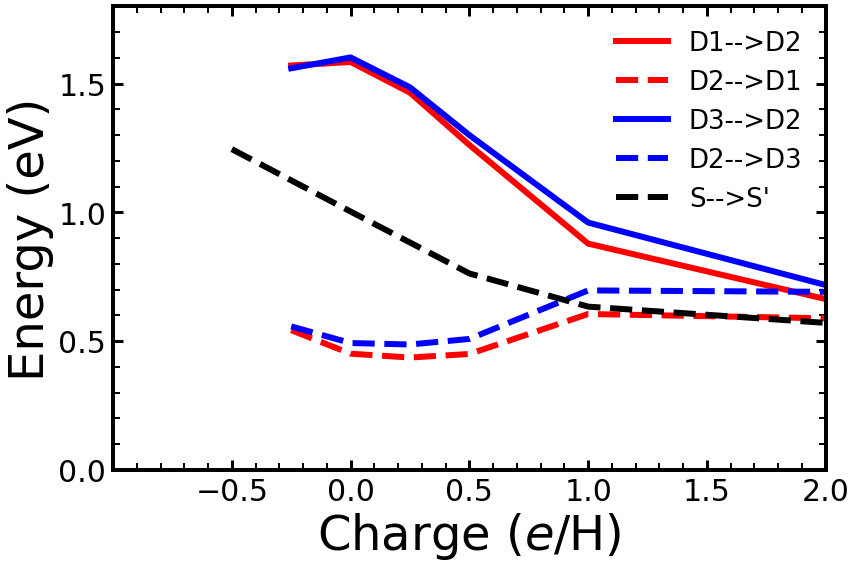

In [5]:
rc('axes', linewidth=4)



fig, ax = plt.subplots()
plt.plot(diff_d['charge'], diff_d['D1-->D2'], 'r', diff_d['charge'], diff_d['D2-->D1'], '--r', diff_d['charge'], diff_d['D3-->D2'], 'b', diff_d['charge'], diff_d['D2-->D3'], '--b', diff_s['charge'], diff_s['S-->S'], '--k', linewidth=6)


fig.set_size_inches(12,8)
plt.xlabel('Charge ($e$/H)', fontsize=48)
plt.ylabel('Energy (eV)', fontsize=48)
plt.legend(['D1-->D2','D2-->D1','D3-->D2','D2-->D3','S-->S\''],fontsize=26,frameon=False)

plt.xticks([-0.5,0,0.5, 1, 1.5,2],fontsize = 30)
axes = plt.gca()
plt.ylim([0, 1.8])
plt.xlim([-1,2])
plt.yticks([0,0.5,1,1.5],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(0.1)
minorLocatory = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

   charge        D1        D2        D3
0   -0.25  0.910301  1.424345  0.923043
1    0.00  0.871993  1.438581  0.883915
2    0.25  0.814439  1.328800  0.829328
3    0.50  0.743308  1.149256  0.753402
4    1.00  0.476608  0.613321  0.481540
5    2.00 -0.181484 -0.144127 -0.157344


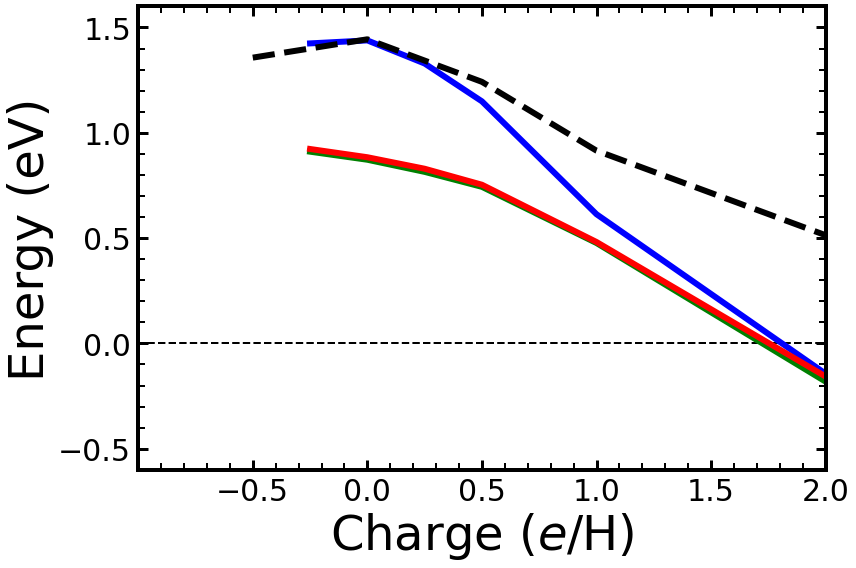

In [8]:
rc('axes', linewidth=4)

fig, ax = plt.subplots()

plt.plot(adsorp_d['charge'], adsorp_d['D1'], 'g', adsorp_d['charge'], adsorp_d['D2'], 'b', adsorp_d['charge'], adsorp_d['D3'], 'r', adsorp_s['charge'], adsorp_s['S'], '--k', linewidth=6,zorder=2)
print(adsorp_d)

fig.set_size_inches(12,8)
plt.xlabel('Charge ($e$/H)', fontsize=48)
plt.ylabel('Energy (eV)', fontsize=48)
# plt.legend(['D1','D2','D3','S'],fontsize=26,frameon=False)
plt.plot([-2,2],[0,0],'k--',linewidth=2,zorder=1)

plt.xticks([-0.5,0,0.5, 1, 1.5,2],fontsize = 30)
axes = plt.gca()
plt.ylim([-0.6, 1.6])
plt.xlim([-1,2])
plt.yticks([-0.5,0,0.5,1,1.5],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(0.1)
minorLocatory = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

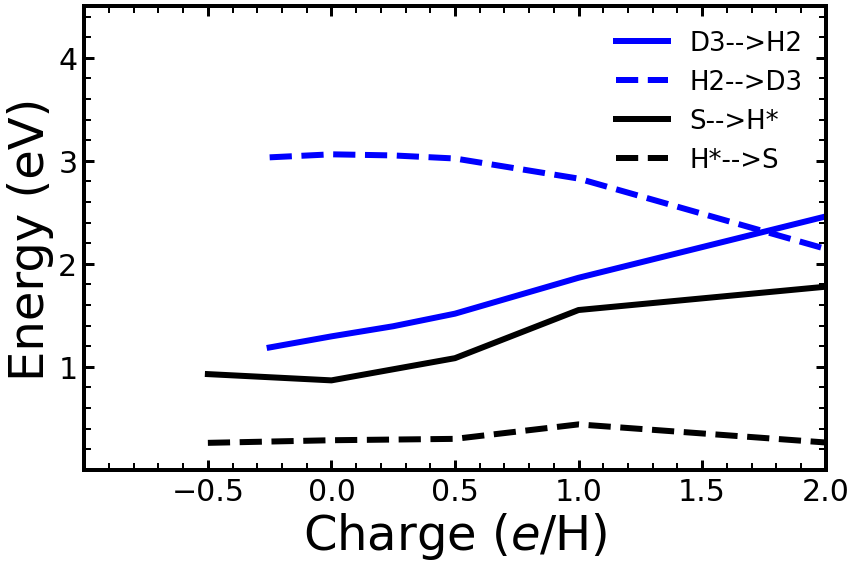

In [17]:
rc('axes', linewidth=4)

fig, ax = plt.subplots()
plt.plot(barrier_d['charge'], barrier_d['D3-->H2'], 'b', barrier_d['charge'], barrier_d['H2-->D3'], '--b', barrier_s['charge'], barrier_s['S-->H*'], 'k', barrier_s['charge'], barrier_s['H*-->S'], '--k', linewidth=6)
# plt.plot(barrier_d['charge'], barrier_d['D3-->H2'], 'b', barrier_s['charge'], barrier_s['S-->H*'], 'k', linewidth=6)


fig.set_size_inches(12,8)
plt.xlabel('Charge ($e$/H)', fontsize=48)
plt.ylabel('Energy (eV)', fontsize=48)
plt.legend(['D3-->H2','H2-->D3','S-->H*','H*-->S'],fontsize=26,frameon=False)


plt.xticks([-0.5,0,0.5, 1, 1.5,2],fontsize = 30)
axes = plt.gca()
plt.ylim([0, 4.5])
plt.xlim([-1,2])
plt.yticks([1,2,3,4],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(0.1)
minorLocatory = MultipleLocator(0.2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

   charge  in_field  out_of_field
0    -0.5  1.356748      1.311562
1     0.0  1.443809      1.440472
2     0.5  1.241767      1.301089
3     1.0  0.915120      1.054802
4     2.0  0.513585      0.831256
0   -0.539705
1    1.000000
2    0.298541
3    0.265883
4    0.342729
dtype: float64


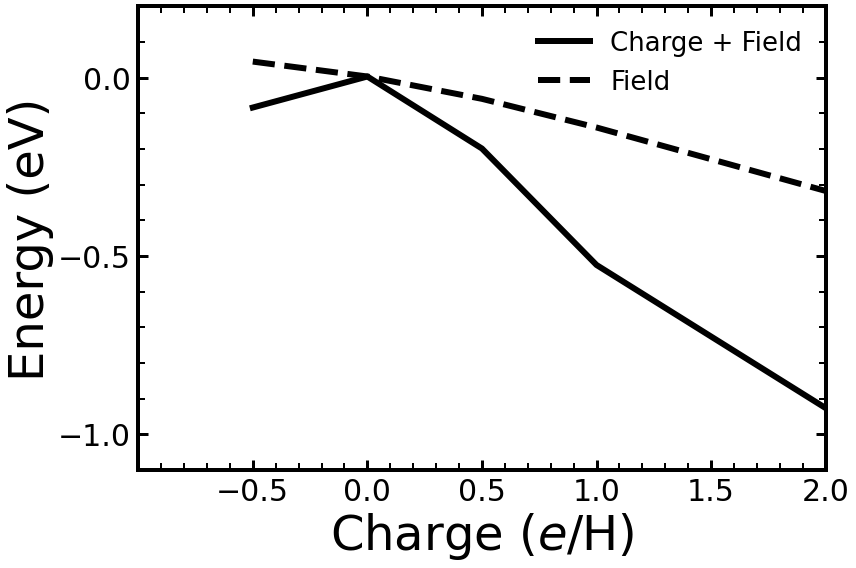

In [18]:
rc('axes', linewidth=4)


fig, ax = plt.subplots()
# plt.plot(ad_en['charge'], ad_en['in_field'], 'k', ad_en['charge'], ad_en['out_of_field'], '--k', linewidth=6)
plt.plot(ad_en['charge'], ad_en['in_field']-ad_en['out_of_field'].iloc[1], 'k', ad_en['charge'], ad_en['in_field']-ad_en['out_of_field'], 'k--', linewidth=6)
print(ad_en)
fig.set_size_inches(12,8)
plt.xlabel('Charge ($e$/H)', fontsize=48)
plt.ylabel('Energy (eV)', fontsize=48)
plt.legend(['Charge + Field','Field'],fontsize=26,frameon=False)
print((ad_en['in_field']-ad_en['out_of_field'])/(ad_en['in_field']-ad_en['out_of_field'].iloc[1]))

plt.xticks([-0.5,0,0.5, 1, 1.5,2],fontsize = 30)
axes = plt.gca()
plt.ylim([-1.1, 0.2])
plt.xlim([-1,2])
plt.yticks([-1,-0.5,0],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(0.1)
minorLocatory = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

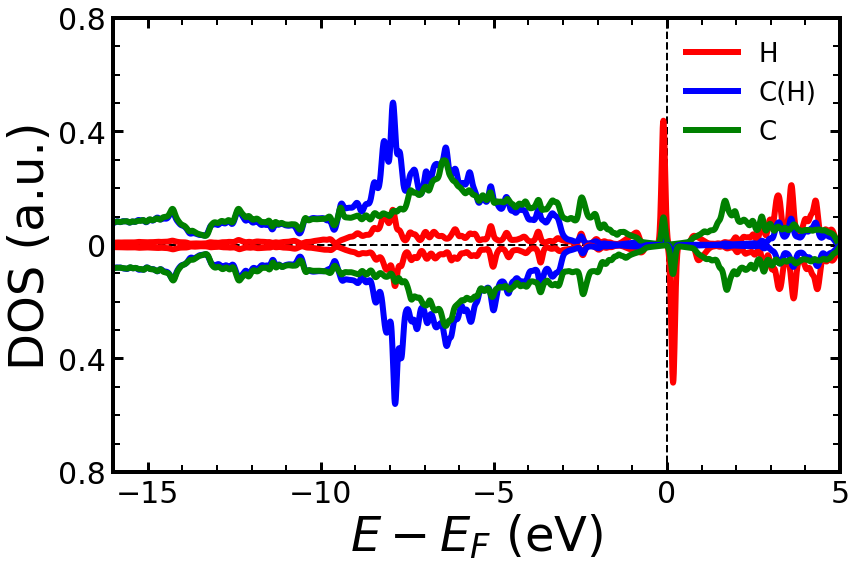

In [13]:
rc('axes', linewidth=4)



fig, ax = plt.subplots()

plt.plot(PDOS_s['E-Ef'], PDOS_s['H_up'], 'r', PDOS_s['E-Ef'], PDOS_s['CH_up'], 'b', PDOS_s['E-Ef'], PDOS_s['C_up'], 'g', PDOS_s['E-Ef'], PDOS_s['H_down'], 'r', PDOS_s['E-Ef'], PDOS_s['CH_down'], 'b', PDOS_s['E-Ef'], PDOS_s['C_down'], 'g', linewidth=6,zorder=2)


fig.set_size_inches(12,8)
plt.xlabel('$E-E_F$ (eV)', fontsize=48)
plt.ylabel('DOS (a.u.)', fontsize=48)
plt.legend(['H','C(H)','C'],fontsize=26,frameon=False)
plt.plot([-20,10],[0,0],'--k',[0,0],[-2,2],'--k',linewidth=2,zorder=1)


plt.xticks([-15,-10,-5,0,5],fontsize = 30)
axes = plt.gca()
plt.ylim([-0.8,0.8])
plt.xlim([-16,5])
plt.yticks([-0.8,-0.4,0,0.4,0.8],fontsize = 30)
ax.set_yticklabels([0.8,0.4,0,0.4,0.8],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(1)
minorLocatory = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

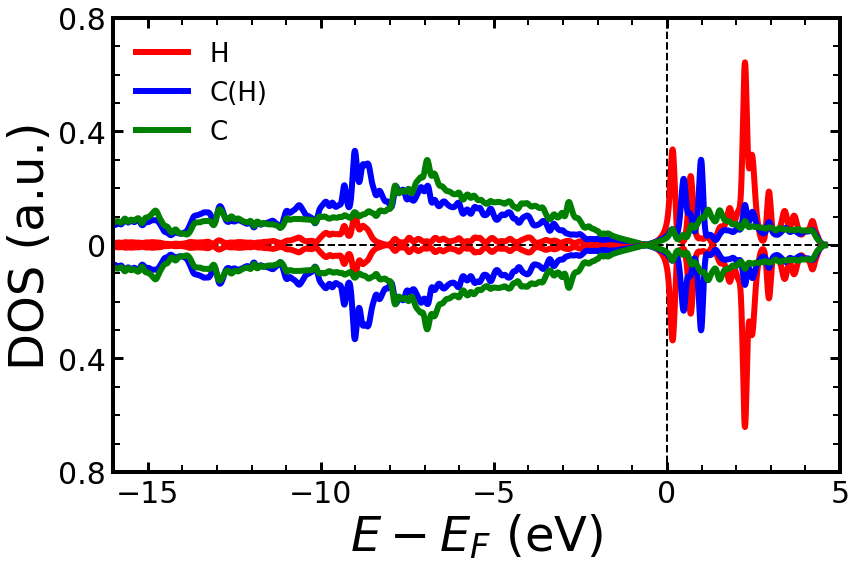

In [14]:
rc('axes', linewidth=4)



fig, ax = plt.subplots()
# plt.plot(linewidth=2)
plt.plot(PDOS_t['E-Ef'], PDOS_t['H_up'], 'r', PDOS_t['E-Ef'], PDOS_t['CH_up'], 'b', PDOS_t['E-Ef'], PDOS_t['C_up'], 'g', PDOS_t['E-Ef'], PDOS_t['H_down'], 'r', PDOS_t['E-Ef'], PDOS_t['CH_down'], 'b', PDOS_t['E-Ef'], PDOS_t['C_down'], 'g', linewidth=6,zorder=2)


fig.set_size_inches(12,8)
plt.xlabel('$E-E_F$ (eV)', fontsize=48)
plt.ylabel('DOS (a.u.)', fontsize=48)
plt.legend(['H','C(H)','C'],fontsize=26,frameon=False)
plt.plot([-20,10],[0,0],'--k',[0,0],[-2,2],'--k',linewidth=2,zorder=1)

plt.xticks([-15,-10,-5,0,5],fontsize = 30)
axes = plt.gca()
plt.ylim([-0.8,0.8])
plt.xlim([-16,5])
plt.yticks([-0.8,-0.4,0,0.4,0.8],fontsize = 30)
ax.set_yticklabels([0.8,0.4,0,0.4,0.8],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(1)
minorLocatory = MultipleLocator(0.1)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()

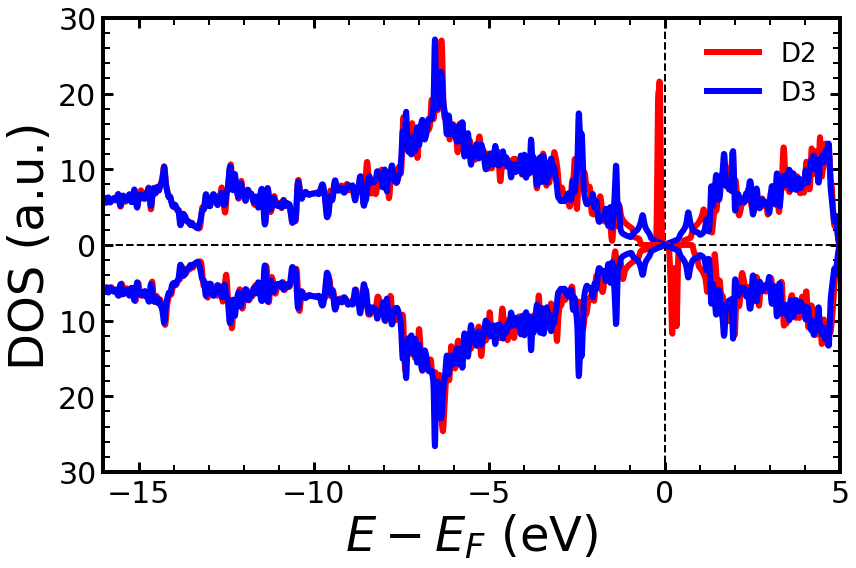

In [15]:
rc('axes', linewidth=4)



fig, ax = plt.subplots()
plt.plot(PDOS_D['E-Ef'], PDOS_D['D2_up'], 'r', PDOS_D['E-Ef'], PDOS_D['D3_up'], 'b', PDOS_D['E-Ef'], PDOS_D['D2_down'], 'r', PDOS_D['E-Ef'], PDOS_D['D3_down'], 'b', linewidth=6,zorder=2)


fig.set_size_inches(12,8)
plt.xlabel('$E-E_F$ (eV)', fontsize=48)
plt.ylabel('DOS (a.u.)', fontsize=48)
plt.legend(['D2','D3'],fontsize=26,frameon=False)
plt.plot([-20,10],[0,0],'--k',[0,0],[-50,50],'--k',linewidth=2,zorder=1)

plt.xticks([-15,-10,-5,0,5],fontsize = 30)
axes = plt.gca()
plt.ylim([-30,30])
plt.xlim([-16,5])
plt.yticks([-30,-20,-10,0,10,20,30],fontsize = 30)
ax.set_yticklabels([30,20,10,0,10,20,30],fontsize = 30)
majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%d')
minorLocatorx = MultipleLocator(1)
minorLocatory = MultipleLocator(2)
ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
plt.tick_params(direction='in',which='major',bottom=True,top=True,left=True,right=True,length=10,width=3,pad=7)
plt.tick_params(direction='in',which='minor',bottom=True,top=True,left=True,right=True,length=7,width=2,pad=7)
plt.tight_layout()